**Bước 0:Cài đặt thư viện và import**
- pip install pandas
- pip install numpy
- pip install matplotlib
- pip install scikit-learn (sklearn)
- pip install pickle (nếu lỗi version thì pip install pickle5)
- pip install yfinance (data về chứng khoán)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Bước 1: Đọc DATA và khám phá dữ liệu (Công ty Apple)**


In [2]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'AAPL'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2024-06-14')

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2003-10-20 00:00:00+00:00,0.349771,0.414643,0.416786,0.399643,0.403571,279132000
2003-10-21 00:00:00+00:00,0.349169,0.413929,0.417857,0.406250,0.416250,176461600
2003-10-22 00:00:00+00:00,0.342842,0.406429,0.414286,0.405000,0.409643,161599200
2003-10-23 00:00:00+00:00,0.346306,0.410536,0.413393,0.403393,0.405893,165211200
2003-10-24 00:00:00+00:00,0.340431,0.403571,0.408036,0.396964,0.402857,219856000
...,...,...,...,...,...,...
2024-06-07 00:00:00+00:00,196.446243,196.889999,196.940002,194.139999,194.649994,53103900
2024-06-10 00:00:00+00:00,192.684723,193.119995,197.300003,192.149994,196.899994,97262100


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5198 entries, 2003-10-20 00:00:00+00:00 to 2024-06-13 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  5198 non-null   float64
 1   (Close, AAPL)      5198 non-null   float64
 2   (High, AAPL)       5198 non-null   float64
 3   (Low, AAPL)        5198 non-null   float64
 4   (Open, AAPL)       5198 non-null   float64
 5   (Volume, AAPL)     5198 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 284.3 KB


In [8]:
# Những feature của tập dữ liệu
stock_data.keys()

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [9]:
# Thống kê mô tả về tập dữ liệu
description = stock_data.describe()
mode = stock_data.select_dtypes(include=["number"]).mode().iloc[0]
mode.name = "mode"
median = stock_data.select_dtypes(include=["number"]).median()
median.name = "median"
description = description._append(mode)
description = description._append(median)
description

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5.198000e+03
mean,43.835798,45.550788,46.007545,45.054065,45.519522,3.980800e+08
std,56.102497,56.326512,56.881308,55.716918,56.272053,3.941512e+08
min,0.296748,0.351786,0.355179,0.343750,0.350893,2.404830e+07
25%,4.861919,5.763660,5.889911,5.656786,5.794375,1.088124e+08
50%,18.710442,21.928928,22.145000,21.652322,21.991428,2.602040e+08
75%,49.199926,51.265001,51.714999,50.863750,51.105623,5.619334e+08
max,213.757141,214.240005,220.199997,211.600006,214.740005,3.372970e+09
mode,0.318590,0.377679,3.214286,2.381429,18.750000,9.095670e+07


**Bước 2: Kiểm tra và tiền xử lý dữ liệu(nếu có)**

In [10]:
stock_data.shape
# kích thước dữ liệu

(5198, 6)

In [11]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

,,0
Price,Ticker,
Adj Close,AAPL,float64
Close,AAPL,float64
High,AAPL,float64
Low,AAPL,float64
Open,AAPL,float64
Volume,AAPL,int64


In [12]:
stock_data.isnull().sum()
#check missing value

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


**Ta thấy tập dữ liệu này khá là sạch**

**Vẽ biểu đồ phân tích**

1. Vẽ biểu đồ cột

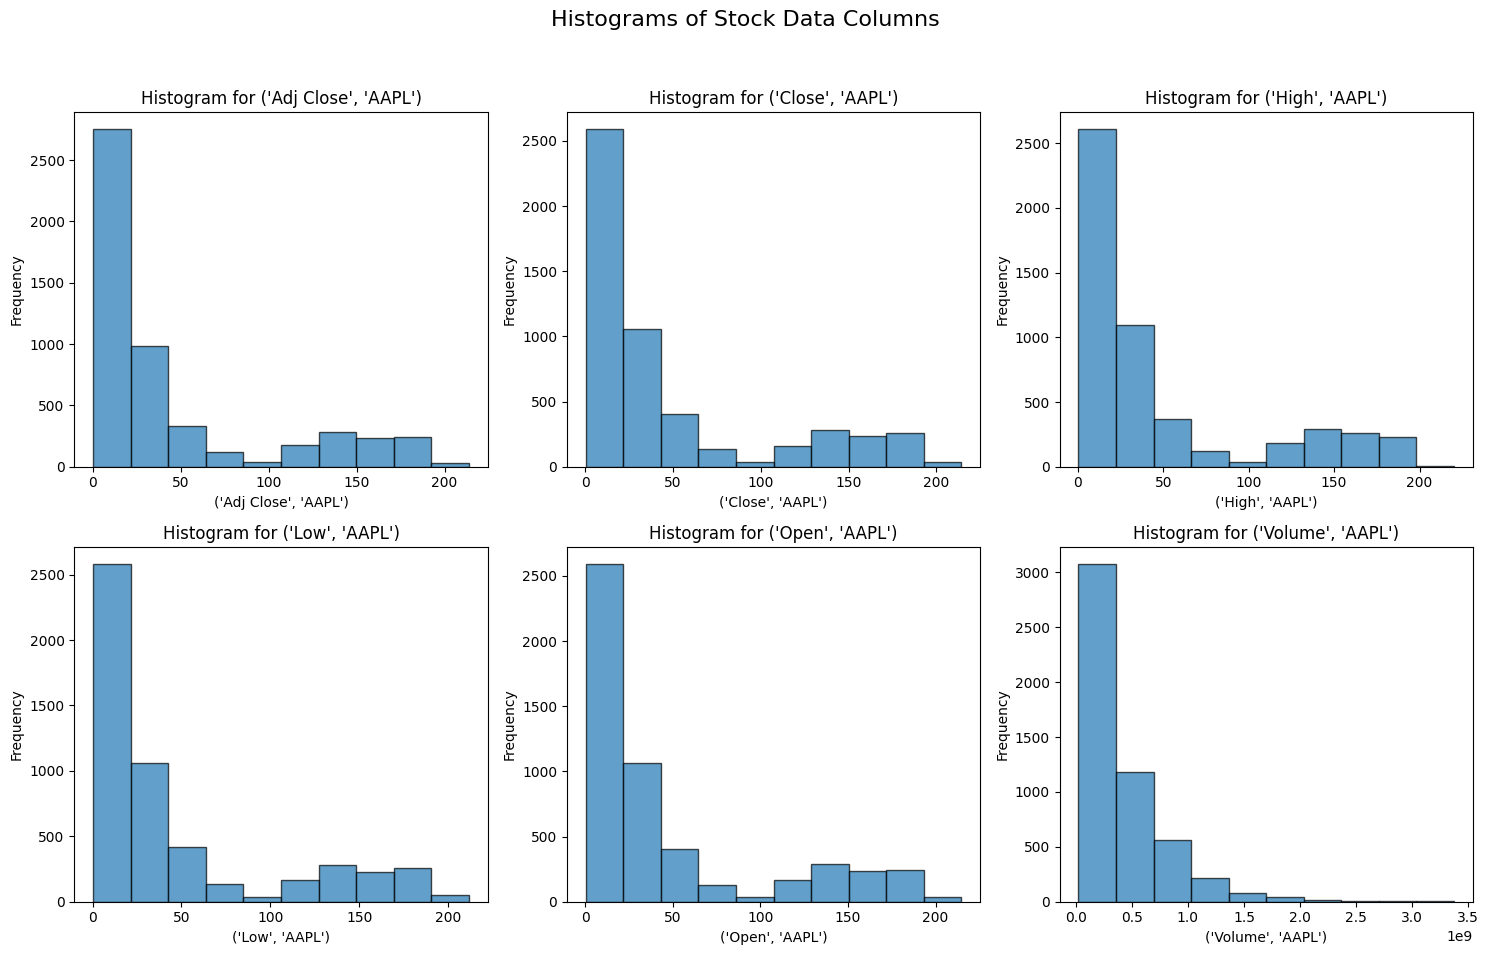

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Histograms of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ histogram
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].hist(stock_data[column], bins=10, edgecolor='k', alpha=0.7)
    axs[row, col].set_title(f'Histogram for {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()

2. Biểu đồ hộp

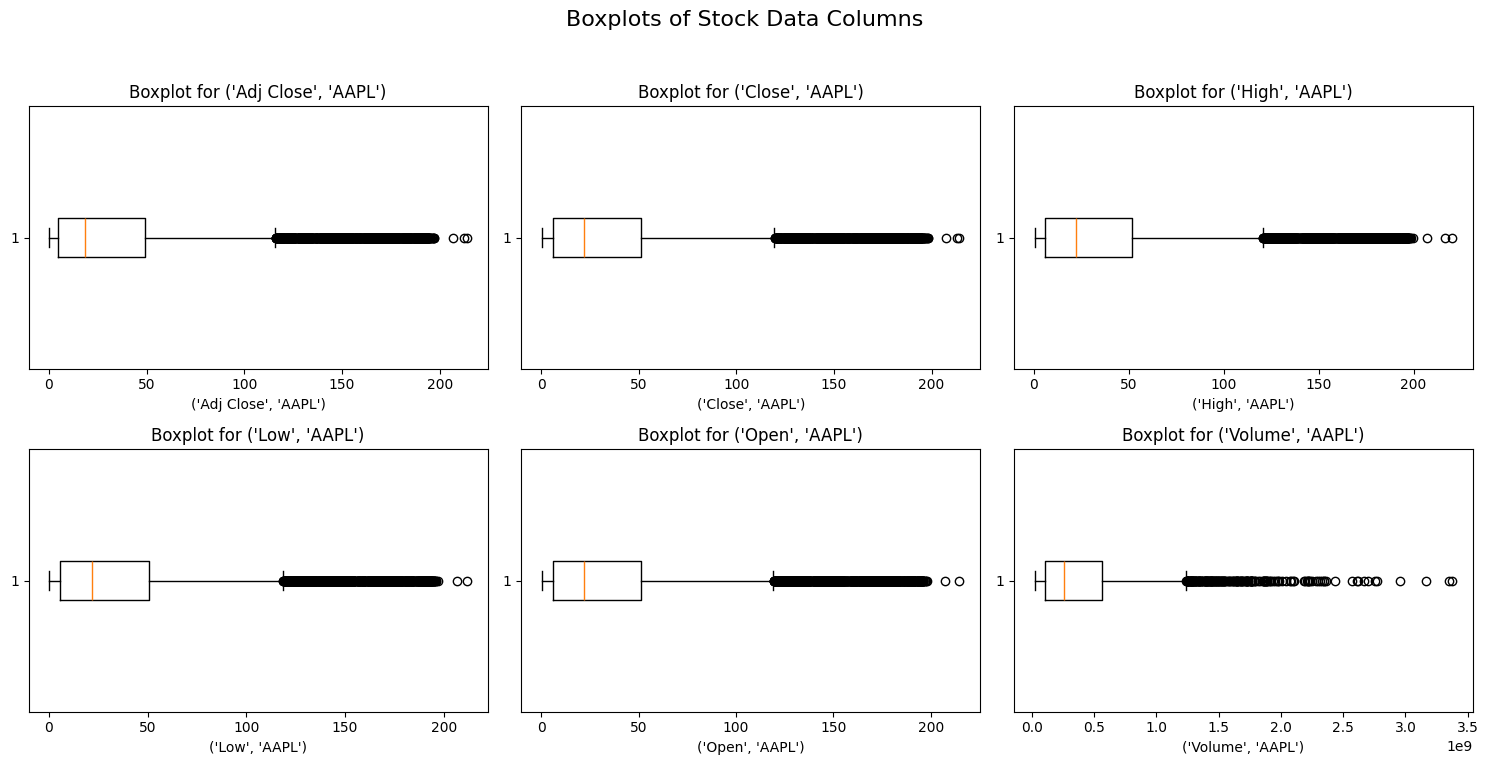

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Boxplots of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ boxplot
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].boxplot(stock_data[column], vert=False)
    axs[row, col].set_title(f'Boxplot for {column}')
    axs[row, col].set_xlabel(column)

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()

3. Biểu đồ Heatmap

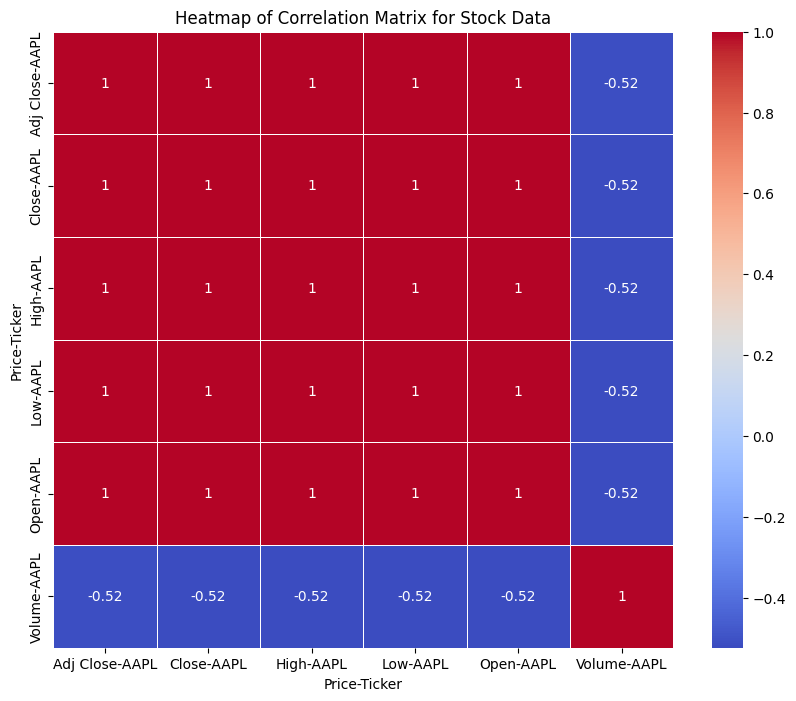

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()

4. Biểu đồ scatter

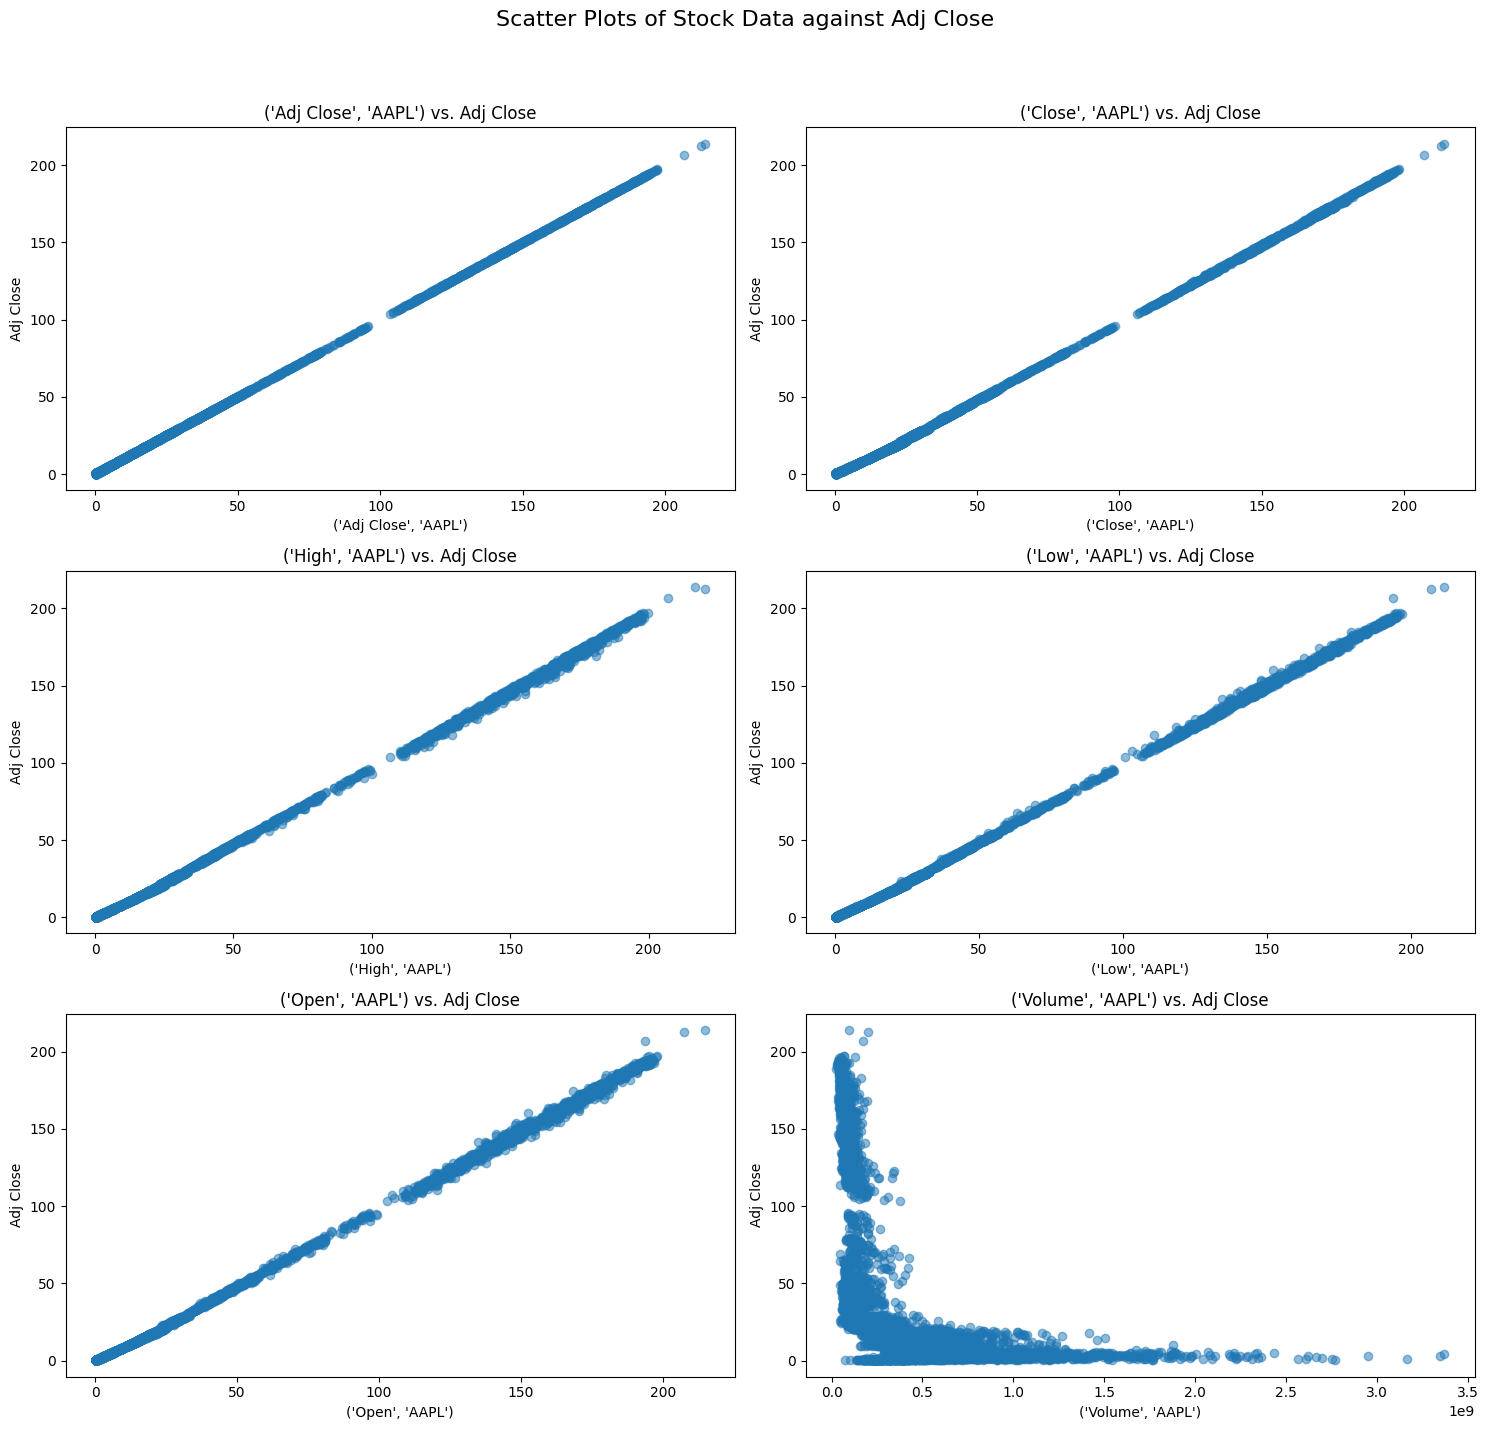

In [16]:
# Tính toán số lượng cột và số lượng hàng dựa vào số cột trong DataFrame
num_cols = len(stock_data.columns)
num_rows = (num_cols + 1) // 2  # Số hàng làm tròn lên nếu có số lẻ cột

# Tạo subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle('Scatter Plots of Stock Data against Adj Close', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ scatter
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 2)
    axs[row, col].scatter(stock_data[column], stock_data['Adj Close'], alpha=0.5)
    axs[row, col].set_title(f'{column} vs. Adj Close')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Adj Close')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Thông qua biểu đồ heatmap và biểu đồ scatter, ta thấy sự phụ thuộc tuyến tính giữa cột Adj close với các cột Open, Hight, Low, Close.
Vì thế nên ta sẽ chia tập X, Y như sau:

In [17]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (Y)
Y = stock_data['Adj Close']
Y

Ticker,AAPL
Date,
2003-10-20 00:00:00+00:00,0.349771
2003-10-21 00:00:00+00:00,0.349169
2003-10-22 00:00:00+00:00,0.342842
2003-10-23 00:00:00+00:00,0.346306
2003-10-24 00:00:00+00:00,0.340431
...,...
2024-06-07 00:00:00+00:00,196.446243
2024-06-10 00:00:00+00:00,192.684723
2024-06-11 00:00:00+00:00,206.683105


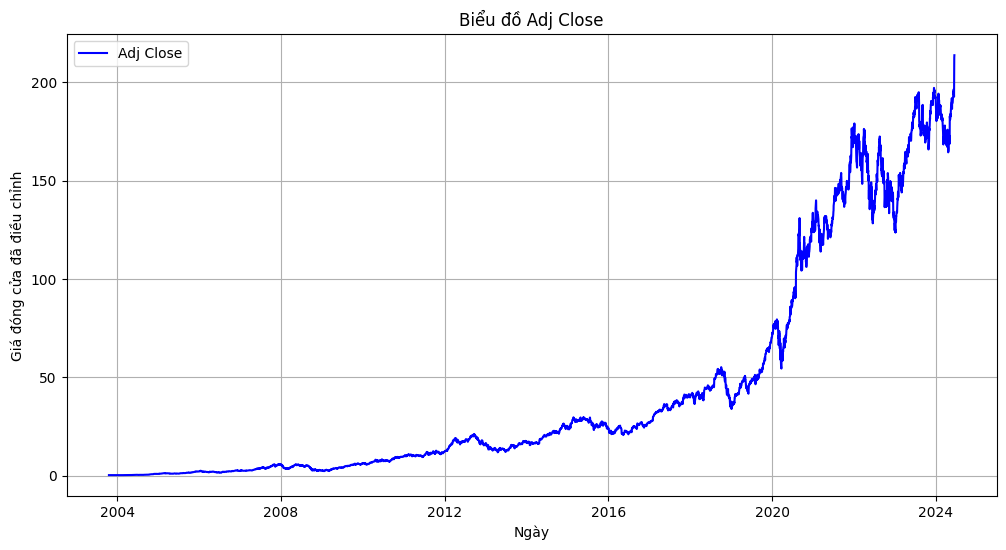

In [18]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, Y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Chọn các cột trừ cột 'Adj Close' và 'Volume làm biến độc lập (X)
X = stock_data.drop(columns=['Adj Close','Volume'])
X

Price,Close,High,Low,Open
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2003-10-20 00:00:00+00:00,0.414643,0.416786,0.399643,0.403571
2003-10-21 00:00:00+00:00,0.413929,0.417857,0.406250,0.416250
2003-10-22 00:00:00+00:00,0.406429,0.414286,0.405000,0.409643
2003-10-23 00:00:00+00:00,0.410536,0.413393,0.403393,0.405893
2003-10-24 00:00:00+00:00,0.403571,0.408036,0.396964,0.402857
...,...,...,...,...
2024-06-07 00:00:00+00:00,196.889999,196.940002,194.139999,194.649994
2024-06-10 00:00:00+00:00,193.119995,197.300003,192.149994,196.899994


Thay vì sử dụng chỉ số (index) là số thứ tự thì ta sẽ dùng ngày tháng. Do không ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự.

In [20]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

X_train:  (4158, 4)
X_test:  (1040, 4)
Y_train:  (4158, 1)
Y_test:  (1040, 1)


In [22]:
X_train

Price,Close,High,Low,Open
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2011-10-04 00:00:00+00:00,13.303571,13.635714,12.651429,13.377500
2018-06-21 00:00:00+00:00,46.365002,47.087502,46.235001,46.812500
2017-04-27 00:00:00+00:00,35.947498,36.040001,35.827499,35.980000
2018-03-26 00:00:00+00:00,43.192501,43.275002,41.610001,42.017502
2004-12-03 00:00:00+00:00,1.119286,1.160714,1.102679,1.152321
...,...,...,...,...
2005-08-25 00:00:00+00:00,1.645000,1.660357,1.636071,1.647143
2016-02-02 00:00:00+00:00,23.620001,24.010000,23.570000,23.855000


In [23]:
X_test

Price,Close,High,Low,Open
Ticker,AAPL,AAPL,AAPL,AAPL
Date,,,,
2009-02-06 00:00:00+00:00,3.561429,3.571429,3.464286,3.465000
2004-02-12 00:00:00+00:00,0.423750,0.428393,0.421429,0.421607
2016-09-27 00:00:00+00:00,28.272499,28.295000,28.084999,28.250000
2010-03-09 00:00:00+00:00,7.965000,8.035714,7.781786,7.796786
2022-03-17 00:00:00+00:00,160.619995,161.000000,157.630005,158.610001
...,...,...,...,...
2008-06-20 00:00:00+00:00,6.259643,6.464286,6.250000,6.405357
2007-06-27 00:00:00+00:00,4.353214,4.358571,4.259286,4.307500


In [24]:
Y_train

Ticker,AAPL
Date,
2011-10-04 00:00:00+00:00,11.222191
2018-06-21 00:00:00+00:00,43.976467
2017-04-27 00:00:00+00:00,33.435734
2018-03-26 00:00:00+00:00,40.810036
2004-12-03 00:00:00+00:00,0.944171
...,...
2005-08-25 00:00:00+00:00,1.387635
2016-02-02 00:00:00+00:00,21.398649
2018-10-12 00:00:00+00:00,52.851665


In [25]:
Y_test

Ticker,AAPL
Date,
2009-02-06 00:00:00+00:00,3.004234
2004-02-12 00:00:00+00:00,0.357453
2016-09-27 00:00:00+00:00,26.049740
2010-03-09 00:00:00+00:00,6.718852
2022-03-17 00:00:00+00:00,158.232681
...,...
2008-06-20 00:00:00+00:00,5.280303
2007-06-27 00:00:00+00:00,3.672141
2013-09-09 00:00:00+00:00,15.679588


Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("/content/drive/MyDrive/PhanVanKiet_Scaler/Scaler_Apple.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)

In [27]:
X_train, X_train.shape

(array([[0.06054223, 0.06040868, 0.05825948, 0.06076151],
        [0.21511757, 0.21256959, 0.21723026, 0.21671626],
        [0.1664116 , 0.16231823, 0.16796544, 0.16618897],
        ...,
        [0.25795589, 0.25183592, 0.25498061, 0.25539593],
        [0.91411289, 0.89401614, 0.92080703, 0.90979014],
        [0.01403204, 0.0137134 , 0.0140951 , 0.01397742]]),
 (4158, 4))

In [28]:
X_test, X_test.shape

(array([[ 1.49938374e-02,  1.46296375e-02,  1.47713310e-02,
          1.45254901e-02],
        [ 3.23939702e-04,  3.33025792e-04,  3.67700392e-04,
          3.29839496e-04],
        [ 1.30527921e-01,  1.27088832e-01,  1.31315633e-01,
          1.30133040e-01],
        ...,
        [ 8.28622415e-02,  8.08971553e-02,  8.34894950e-02,
          8.24893578e-02],
        [-3.33825295e-06,  4.87151013e-06,  2.95848945e-05,
          2.24871610e-05],
        [ 5.36808301e-01,  5.25347018e-01,  5.31327443e-01,
          5.29686929e-01]]),
 (1040, 4))

**Bước 3: Huấn luyện mô hình**

In [29]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, Y_train) # fit chính là hàm đào tạo

LinearRegression()

**Bước 4: Đánh giá mô hình**

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [31]:
Y_pred = model.predict(X_test) #dự báo Y_pred dựa trên tập X_test
Y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(Y_test, Y_pred, Y_train, Y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    r2_train = r2_score(Y_train, Y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [32]:
Y_pred.shape

(1040, 1)

In [33]:
Y_test.shape

(1040, 1)

In [34]:
rate(Y_test, Y_pred, Y_train, Y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 0.8826727692385029
R-squared (R2) Score: 0.9997202876352465
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 0.9111672336493624
R-squared (R2) Score: 0.9997070708385516


In [35]:
print(Y_test)

Ticker                           AAPL
Date                                 
2009-02-06 00:00:00+00:00    3.004234
2004-02-12 00:00:00+00:00    0.357453
2016-09-27 00:00:00+00:00   26.049740
2010-03-09 00:00:00+00:00    6.718852
2022-03-17 00:00:00+00:00  158.232681
...                               ...
2008-06-20 00:00:00+00:00    5.280303
2007-06-27 00:00:00+00:00    3.672141
2013-09-09 00:00:00+00:00   15.679588
2003-12-23 00:00:00+00:00    0.298405
2020-11-24 00:00:00+00:00  112.619545

[1040 rows x 1 columns]


In [36]:
print(Y_pred)

[[  2.00094102]
 [ -1.12283756]
 [ 26.62840456]
 ...
 [ 16.47249007]
 [ -1.19296857]
 [113.09357016]]


In [37]:
Y_test = Y_test.values.ravel()  # Hoặc Y_test = Y_test.flatten()
Y_pred = Y_pred.ravel()  # Hoặc Y_pred = Y_pred.flatten()

df_result = pd.DataFrame({'Actual':Y_test, 'Predicted': Y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
0,3.004234,2.000941
1,0.357453,-1.122838
2,26.049740,26.628405
3,6.718852,6.386402
4,158.232681,158.410963
5,58.782593,59.022389
6,9.980670,10.239116
7,14.401165,15.000676
8,2.017284,0.837493
9,17.114971,18.660208


<Axes: >

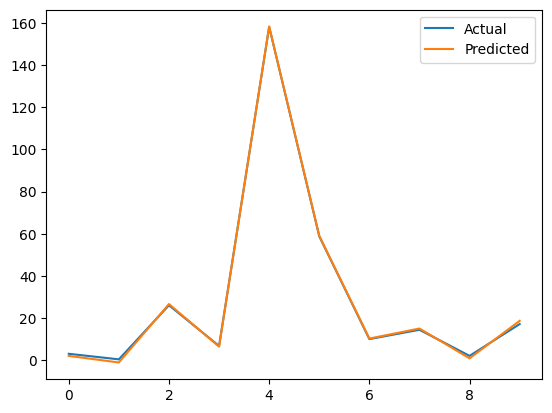

In [38]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

In [39]:
import pickle
# Lưu mô hình vào tệp
with open("/content/drive/MyDrive/PhanVanKiet_Model/Model_Apple.pkl", "wb") as model_file:
    pickle.dump(model, model_file)